#Homework 3

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')


## Question 1

Create a pie chart which shows the proportion of male/female passengers.

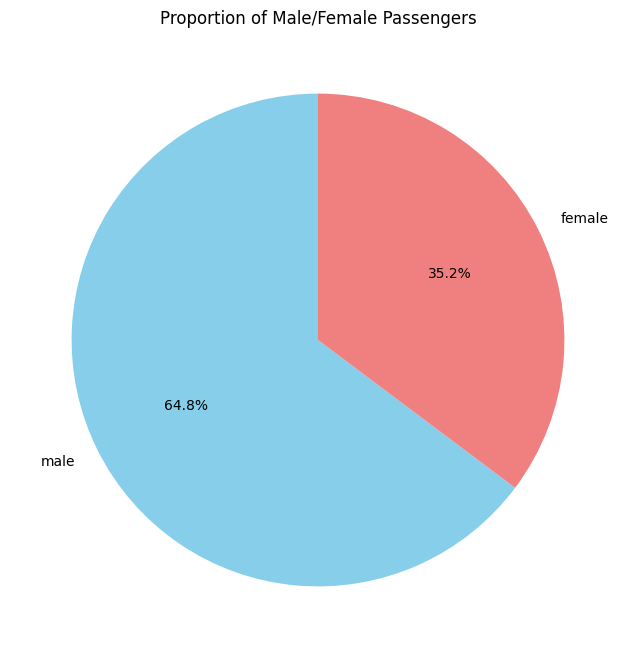

In [126]:
# Count the number of male and female passengers
gender_counts = titanic['sex'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Male/Female Passengers')
plt.show()

## Question 2

**Create** a pie chart which shows the proportion of passengers in each class (1, 2, 3).

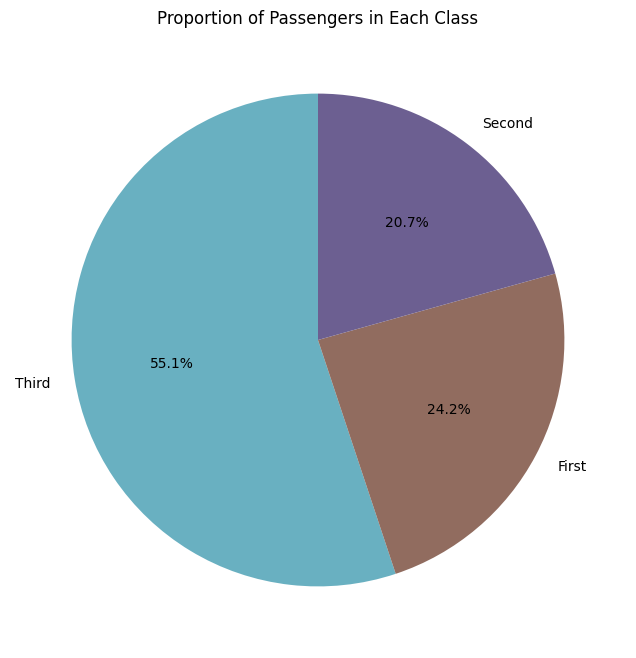

In [127]:
# Count the number of passengers in each class
class_counts = titanic['class'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#69B0C1', '#916c5f', '#6c5f91'])
plt.title('Proportion of Passengers in Each Class')
plt.show()

## Question 3

Explain the relationship between age and fare using a visualisation.


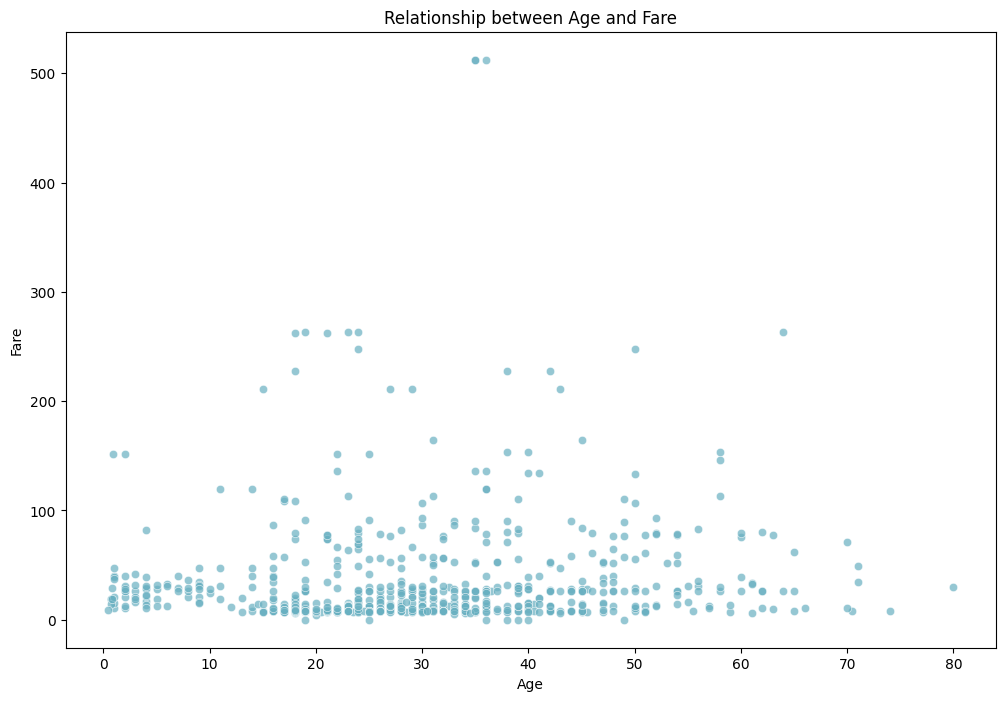

In [128]:
titanic_cleaned = titanic.dropna(subset=['age', 'fare', 'class', 'survived'])

# Plot a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='fare', data=titanic_cleaned, alpha=0.7, color='#69B0C1')
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Divide the data into age groups using .loc
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51-100']
titanic_cleaned = titanic_cleaned.assign(age_group=pd.cut(titanic_cleaned['age'], bins=bins, labels=labels))


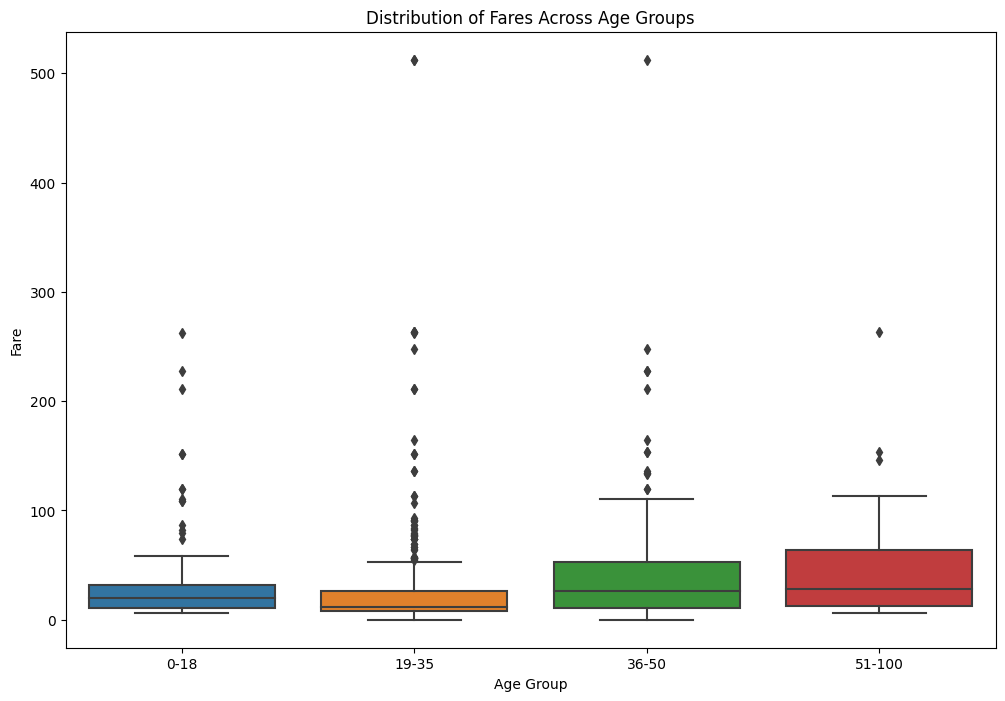

In [129]:
# Create a boxplot to visualize the distribution of fares across age groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='fare', data=titanic_cleaned)

# Add title and axis labels for better interpretation
plt.title('Distribution of Fares Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Fare')

# Display the plot
plt.show()

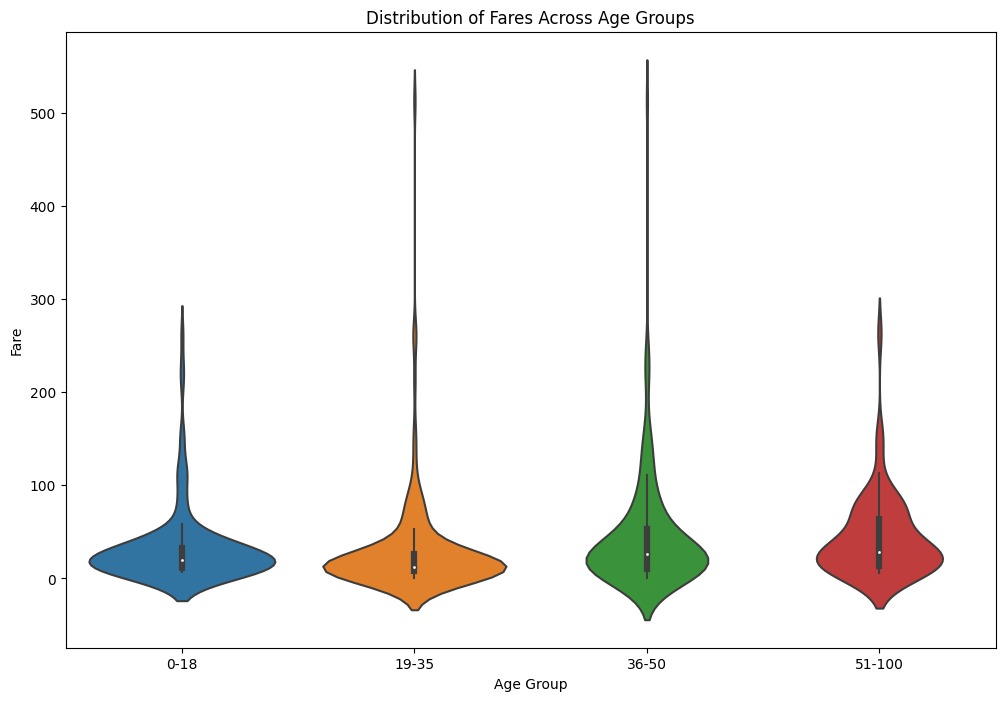

In [130]:
# Create a violin plot to visualize the distribution of fares across age groups
plt.figure(figsize=(12, 8))
sns.violinplot(x='age_group', y='fare', data=titanic_cleaned)

# Add title and axis labels for better interpretation
plt.title('Distribution of Fares Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Fare')

# Display the plot
plt.show()


In the course of exploring the data, I have used various visualizations with the dataset to discern patterns in the relationship between age and fare. However, the visualizations have not revealed clear and distinct conclusions. overall the fare values exhibit variability, and while there is a general tendency for fares to increase with age, the data displays significant fluctuations. To gain a more comprehensive understanding, further exploration with additional variables may be warranted, as this may show nuanced insights and contribute to a more comprehensive interpretation of the dataset.

##Question 4


What is the survival ratio by age, sex, and class.

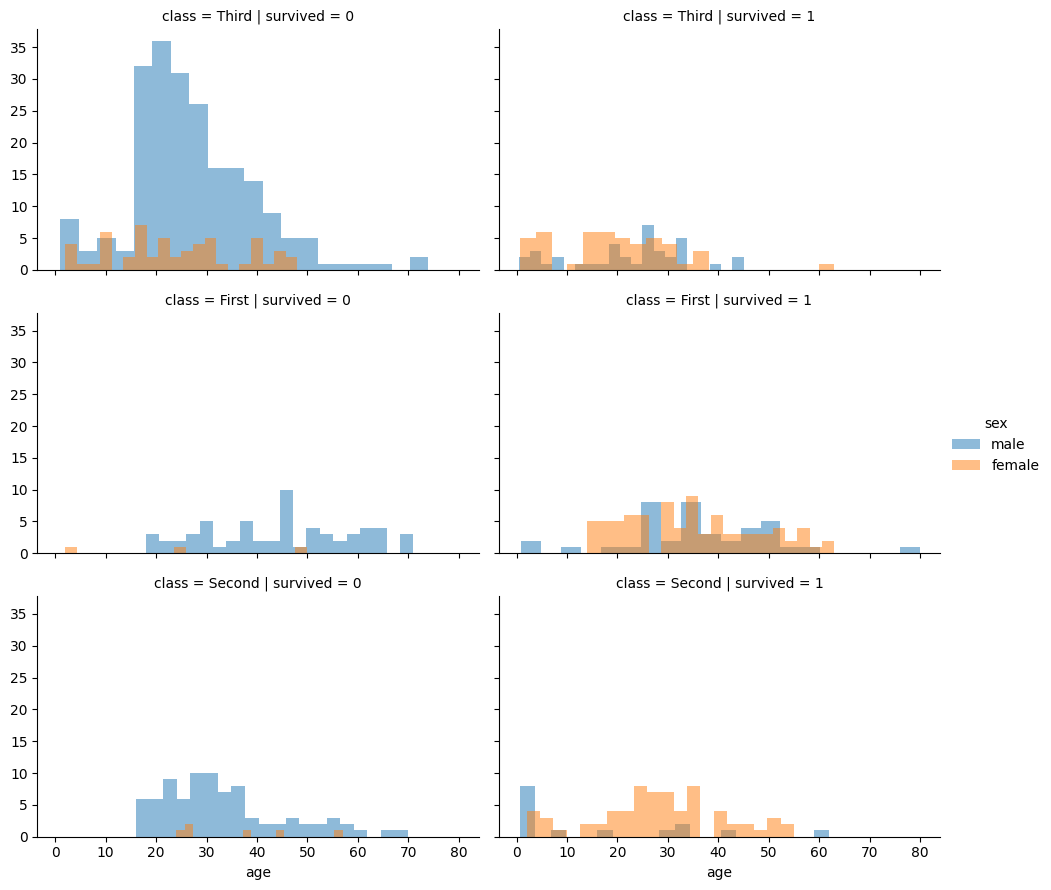

In [131]:
# Create a FacetGrid with rows for each 'class', columns for each 'survived', and hue for 'sex'
grid = sns.FacetGrid(data=titanic_cleaned, col='survived', row='class', hue='sex', aspect=1.6)

# Map a histogram for 'age' on each subplot with transparency and 20 bins
grid.map(plt.hist, 'age', alpha=.5, bins=20)

# Add a legend to differentiate 'sex' with different colors
grid.add_legend()

# Display the plot
plt.show()


<ipython-input-132-bd0368b77c59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_data = titanic.pivot_table(index=pd.cut(titanic['age'], bins=range(0, 90, 20)),


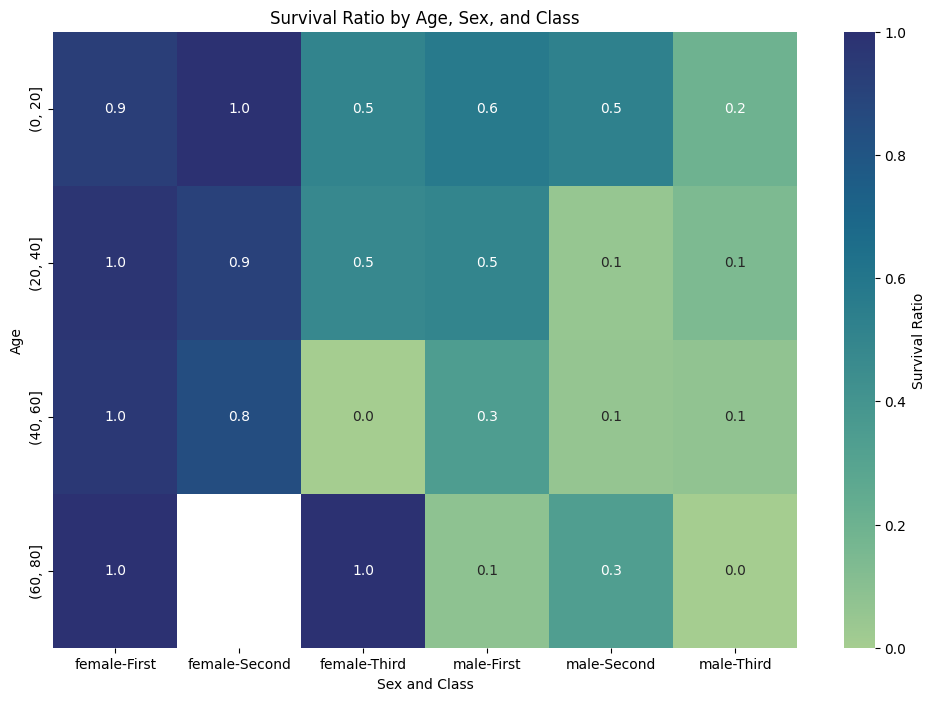

In [132]:
# Question 4: Survival ratio by age, sex, and class using a heatmap with binning for age and ratio format
plt.figure(figsize=(12, 8))
survival_data = titanic.pivot_table(index=pd.cut(titanic['age'], bins=range(0, 90, 20)),
                                    columns=['sex', 'class'], values='survived', aggfunc='mean')

# Function to format ratio as string
def format_ratio(ratio):
    return f'{int(ratio*100)}%:{int((1-ratio)*100)}%'

# Use the fmt parameter to format the annotations to two decimal places
sns.heatmap(survival_data, cmap='crest', annot=True, fmt='.1f', cbar_kws={'label': 'Survival Ratio'})
plt.title('Survival Ratio by Age, Sex, and Class')
plt.xlabel('Sex and Class')
plt.ylabel('Age')
plt.show()


Two different visualizations were employed to explore the intricate relationships within the dataset

First a Facet Grid provided a breakdown of the dataset, organizing subsets based on categorical variables such as 'class' and 'survived.' This approach allowed the creation of individualized histograms for each subset. By incorporating the 'sex' variable as a hue, another level of data was added, enabling a comprehensive examination of the age distribution across 'class' and 'survived' categories. This visualization effectively captured the variations in age distribution between males and females within each category.

The Heatmap offered a comprehensive and visually compelling overview between different variables. This graphical representation identified the correlations among 'age,' 'sex,' 'class,' and 'survived'allowing for a quick and clear assessment of their impact on the survival rate.

The combined insights from both visualizations underscored a trend: women and children exhibited a higher survival rate. This positive correlation diminished with the decrease in social class, revealing a contrast in survival rates between passengers in 1st and 3rd class. Specifically, individuals in 1st class experienced a notably higher survival rate compared to those in 3rd class.